In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data load 

In [2]:
data = pd.read_csv('Customers.csv', sep=';',decimal=',')

In [3]:
data.tail()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
1506,1507,174,18,3,15798.92,17
1507,1508,124,28,12,2676.89,7
1508,1509,1543,4,17,109497.54,54
1509,1510,668,1,3,49602.45,17
1510,1511,82,35,4,1047.58,6


In [4]:
data.shape

(1511, 6)

In [5]:
data.describe()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,756.000000,1102.391132,15.847121,10.710126,1.753805e+05,16.673064
std,436.332442,5457.675137,19.051823,10.348786,1.791089e+06,17.704351
min,1.000000,1.000000,1.000000,1.000000,7.290000e+00,1.000000
25%,378.500000,79.000000,4.000000,3.000000,1.392950e+03,5.000000
50%,756.000000,224.000000,6.000000,9.000000,5.799930e+03,11.000000
75%,1133.500000,559.500000,19.000000,14.500000,2.228900e+04,23.000000
max,1511.000000,105993.000000,91.000000,79.000000,3.253994e+07,139.000000


In [6]:
data.dtypes

CustomerId      int64
Profit          int64
Recency         int64
Frequency       int64
Monetary      float64
Variance        int64
dtype: object

In [7]:
data.isnull().sum()

CustomerId    0
Profit        0
Recency       0
Frequency     0
Monetary      0
Variance      0
dtype: int64

In [8]:
customerID = data['CustomerId']

In [9]:
data.drop(['CustomerId'], axis=1, inplace=True)

In [10]:
data.head()

,Profit,Recency,Frequency,Monetary,Variance
0,187,63,1,2349.06,2
1,96,10,6,922.62,4
2,47,35,4,881.22,3
3,294,5,1,3815.16,2
4,732,4,31,41868.11,29


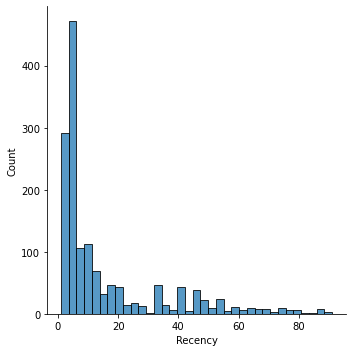

In [11]:
sns.displot(data['Recency'])

# Dimension reduce 

In [12]:
RFM_scores = data[['Recency','Frequency','Monetary']].copy()

In [13]:
quantiles = RFM_scores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles


{'Recency': {0.25: 4.0, 0.5: 6.0, 0.75: 19.0},
 'Frequency': {0.25: 3.0, 0.5: 9.0, 0.75: 14.5},
 'Monetary': {0.25: 1392.95, 0.5: 5799.93, 0.75: 22289.0}}

In [14]:
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4 
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
def FMscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1 
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [15]:
RFM_scores['R'] = RFM_scores['Recency'].apply(Rscoring, args = ('Recency', quantiles)) 
RFM_scores['F'] = RFM_scores['Frequency'].apply(FMscoring, args = ('Frequency', quantiles))
RFM_scores['M'] = RFM_scores['Monetary'].apply(FMscoring, args = ('Monetary', quantiles))

In [16]:
RFM_scores

,Recency,Frequency,Monetary,R,F,M
0,63,1,2349.06,1,1,2
1,10,6,922.62,2,2,1
2,35,4,881.22,1,2,1
3,5,1,3815.16,3,1,2
4,4,31,41868.11,4,4,4
...,...,...,...,...,...,...
1506,18,3,15798.92,2,1,3
1507,28,12,2676.89,1,3,2
1508,4,17,109497.54,4,4,4
1509,1,3,49602.45,4,1,4


In [17]:
RFM_scores['RFM_group']=RFM_scores.R.map(str)+RFM_scores.F.map(str)+RFM_scores.M.map(str)

In [18]:
RFM_scores['RFM_score'] = RFM_scores[['R','F','M']].sum(axis=1)

In [19]:
RFM_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score
0,63,1,2349.06,1,1,2,112,4
1,10,6,922.62,2,2,1,221,5
2,35,4,881.22,1,2,1,121,4
3,5,1,3815.16,3,1,2,312,6
4,4,31,41868.11,4,4,4,444,12


In [ ]:
#Redukuje wymiary określająć parametr RFM_score, dzięki temu będę mógł wykluczyć osobne parametry Recency, Frequency, Monetary

In [20]:
data_analysis = data[['Profit','Variance']].copy()

In [21]:
data_analysis['RFM_score'] = RFM_scores[['RFM_score']].copy()

In [22]:
data_analysis.corr()

,Profit,Variance,RFM_score
Profit,1.000000,0.617295,0.227183
Variance,0.617295,1.000000,0.680433
RFM_score,0.227183,0.680433,1.000000


# Number of groups detection


In [23]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data_analysis)

In [24]:
hier_clust = linkage(data_std, method = 'ward')

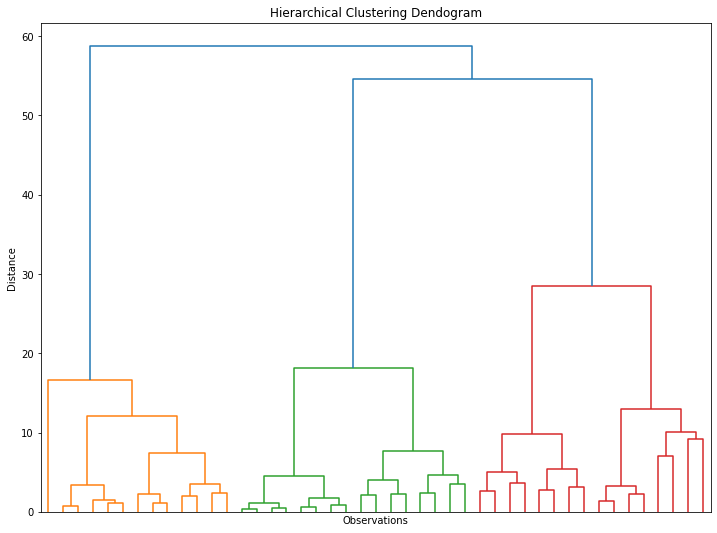

In [25]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,truncate_mode='level', p=5,show_leaf_counts = False, no_labels = True)
plt.show()

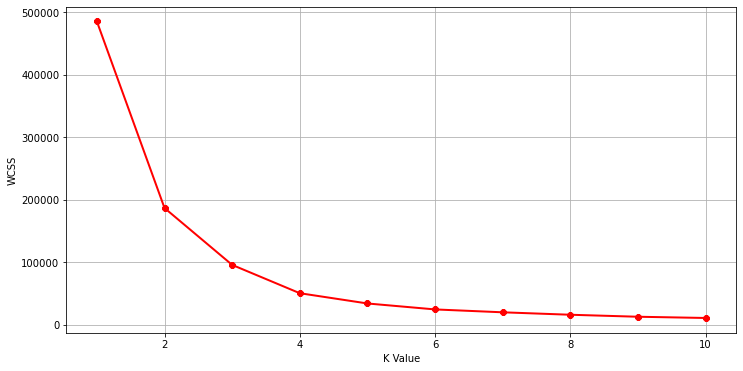

In [26]:
x = data_analysis.iloc[:,1:]
wcss = []
for k in list(range(1,11)):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',max_iter=500, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth =2, color = 'red', marker ='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [27]:
wcss

[485189.70615486463,
 186679.09282132573,
 95714.97365452728,
 50416.28876629591,
 34003.14712884388,
 24472.135635381044,
 19875.6071019233,
 15960.041960282773,
 12761.96263760063,
 10797.654257038183]

In [ ]:
#Najbardziej optymalnym podziałem, bedzie przypisanie klientów do trzech różnych grup.

# Labels assigment

In [28]:
kmeans = KMeans(n_clusters =3)
label = kmeans.fit_predict(data_std)
print(label)

[0 0 0 ... 1 1 0]


In [29]:
label[:200]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int32)

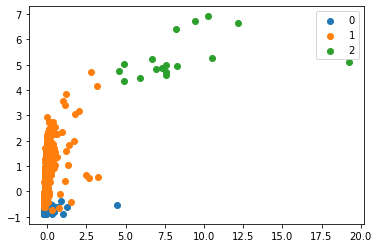

In [30]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(data_std[label == i,0], data_std[label ==i,1], label =i)
plt.legend()
plt.show()

In [31]:
results = pd.DataFrame()
results.head()

""


In [32]:
results['CustomerID'] = customerID

In [33]:
results['SegmentId'] = label

In [34]:
results['SegmentId'].value_counts()

0    827
1    667
2     17
Name: SegmentId, dtype: int64

In [35]:
results

,CustomerID,SegmentId
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
1506,1507,0
1507,1508,0
1508,1509,1
1509,1510,1


In [48]:
results.describe()

,CustomerID,SegmentId
count,1511.000000,1511.000000
mean,756.000000,0.463931
std,436.332442,0.520942
min,1.000000,0.000000
25%,378.500000,0.000000
50%,756.000000,0.000000
75%,1133.500000,1.000000
max,1511.000000,2.000000


In [46]:
results['SegmentId'].value_counts(ascending=True)

2     17
1    667
0    827
Name: SegmentId, dtype: int64

In [36]:
data['SegmentId']=results['SegmentId']

In [38]:
data.to_csv('customers.csv')

In [ ]:
#Etykiety zostały przypisane klientom. Najbardziej wartościowym klientem jest podmiot z przypisaną etykieta '2'.
#Ta grupa klientów stanowi tylko 1% z całego zbioru. 